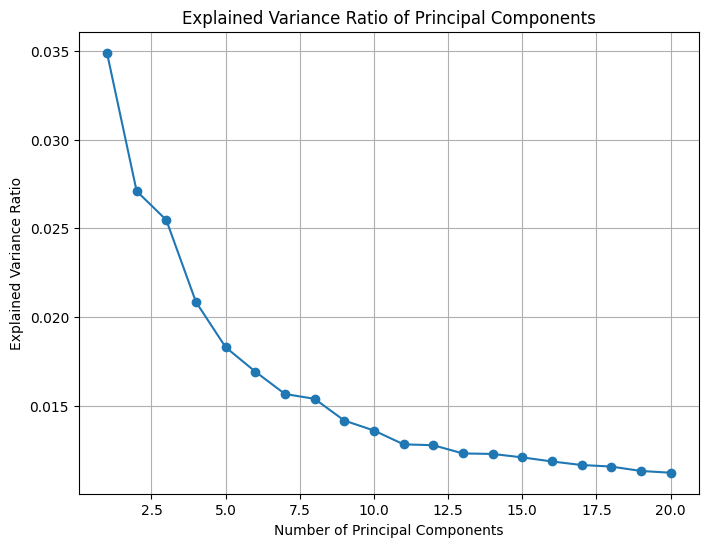

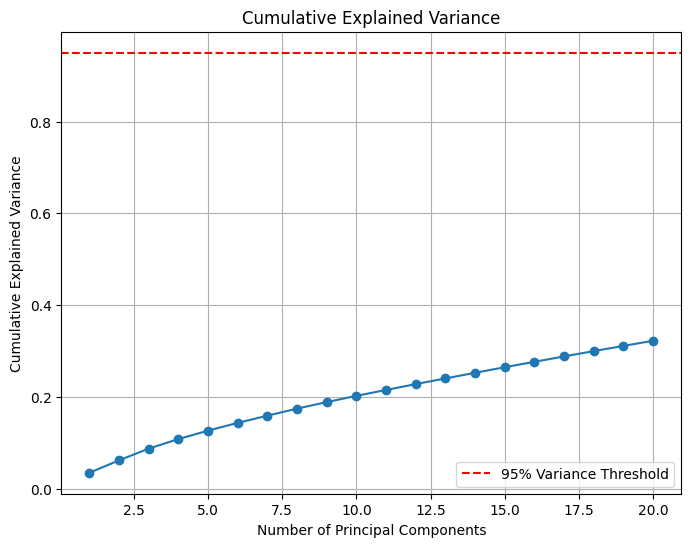

Number of components to retain 95% variance: 1


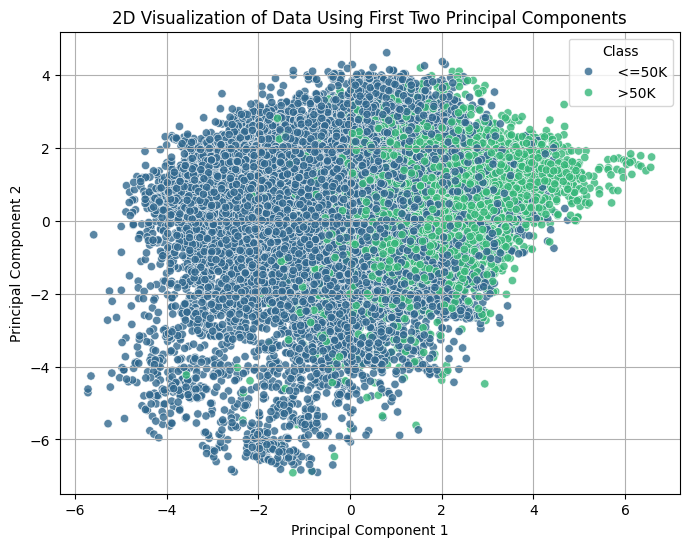

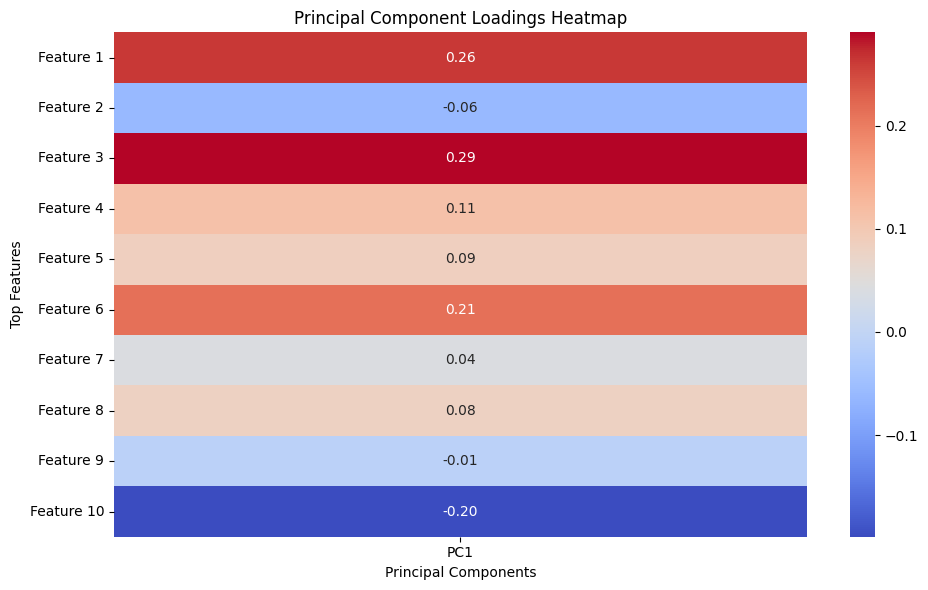

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_and_prepare_data(filepath):
    """Load dataset and perform initial preprocessing."""
    try:
        # Load the dataset
        df = pd.read_csv(filepath, header=None)
        
        # Assign column names
        df.columns = [
            'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
            'marital-status', 'occupation', 'relationship', 'race', 'sex', 
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
        ]

        # Strip any leading or trailing spaces in the column names
        df.columns = df.columns.str.strip()
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def preprocess_data(df):
    """Preprocess dataset: encode categorical variables and standardize."""
    X = df.drop(columns='income')
    y = df['income']

    # One-hot encode categorical features
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    # Standardize numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    return X_scaled, y

def perform_pca(X_scaled, num_components=20):
    """Perform PCA on scaled data."""
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)
    return pca, X_pca

def plot_explained_variance(pca):
    """Plot explained variance ratio for PCA components."""
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio of Principal Components')
    plt.grid(True)
    plt.show()

def plot_cumulative_variance(pca):
    """Plot cumulative explained variance."""
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.argmax(cumulative_variance >= 0.95) + 1

def visualize_pca_2d(X_pca, y):
    """Visualize the first two PCA components in 2D."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.8)
    plt.title("2D Visualization of Data Using First Two Principal Components")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Class")
    plt.grid(True)
    plt.show()

def visualize_loadings(pca, num_features, top_features=10):
    """Visualize PCA loadings heatmap for top contributing features."""
    loadings = pca.components_.T
    num_top_features = min(top_features, loadings.shape[0])  # Adjust for available features
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        loadings[:num_top_features, :num_features],
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        xticklabels=[f"PC{i+1}" for i in range(num_features)],
        yticklabels=[f"Feature {i+1}" for i in range(num_top_features)],
    )
    plt.title("Principal Component Loadings Heatmap")
    plt.xlabel("Principal Components")
    plt.ylabel("Top Features")
    plt.tight_layout()
    plt.show()

# Main Execution Flow
data_file = 'adult.data'

# Load and preprocess data
data = load_and_prepare_data(data_file)
if data is not None:
    X_scaled, y = preprocess_data(data)

    # Perform PCA
    pca, X_pca = perform_pca(X_scaled)

    # Plot explained variance and cumulative variance
    plot_explained_variance(pca)
    components_for_95 = plot_cumulative_variance(pca)
    print(f"Number of components to retain 95% variance: {components_for_95}")

    # Visualize first two components
    visualize_pca_2d(X_pca, y)

    # Visualize PCA loadings
    visualize_loadings(pca, components_for_95)
